In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
sns.set(style="ticks")

In [2]:
data = pd.read_csv("../covid-19-data/us-states.csv")
data['date'] = pd.to_datetime(data.date)
data['state'] = data.state.astype(str)
data.drop(['fips'], axis=1, inplace=True)
wiki = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population")[0][['State','Population estimate, July 1, 2019[2]']]
wiki.columns = ['state', 'population']

data = pd.merge(data, wiki, on='state', how='inner')
data['case_pct'] = 100 * data.cases / data.population
data.set_index('date', inplace=True)

#adj_states = pd.read_table("https://introcs.cs.princeton.edu/java/data/contiguous-usa.dat", delimiter=' ', header=None, names=['st1', 'st2'])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1699 entries, 2020-01-21 to 2020-04-02
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state       1699 non-null   object 
 1   cases       1699 non-null   int64  
 2   deaths      1699 non-null   int64  
 3   population  1699 non-null   int64  
 4   case_pct    1699 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 79.6+ KB


In [4]:
data.groupby(['state'])[['cases', 'deaths', 'case_pct']].describe()

cases                                            \
                         count          mean           std   min     25%   
state                                                                      
Alabama                   21.0    405.000000    418.465291   6.0   51.00   
Alaska                    22.0     51.772727     52.539266   1.0    6.75   
Arizona                   68.0    145.250000    360.355810   1.0    1.00   
Arkansas                  23.0    229.391304    224.559921   1.0   22.00   
California                69.0   1108.086957   2441.093214   1.0    7.00   
Colorado                  29.0    885.413793   1139.146250   2.0   49.00   
Connecticut               26.0    845.653846   1193.613503   1.0   21.50   
Delaware                  23.0    115.130435    125.223547   1.0   12.00   
District of Columbia      27.0    168.777778    199.180501   1.0   13.00   
Florida                   33.0   1586.424242   2518.615729   2.0   14.00   
Georgia                   32.0   1009.937500   1516.137025   2.0   20.75   
Guam                      19.0     47.000000     48.166378   3.0   13.00   
Hawaii                    28.0     71.964286     86.854703   1.0    2.00   
Idaho                     21.0    186.523810    249.171752   1.0   11.00   
Illinois                  70.0    684.457143   1685.768037   1.0    2.00   
Indiana                   28.0    559.892857    873.485837   1.0   12.00   
Iowa                      26.0    152.076923    185.741955   3.0   19.00   
Kansas                    27.0    127.333333    168.580955   1.0    7.00   
Kentucky                  28.0    172.678571    226.570086   1.0   11.00   
Louisiana                 25.0   1779.560000   2364.858489   1.0  103.00   
Maine                     22.0    128.636364    117.820503   1.0   34.75   
Maryland                  29.0    452.793103    663.957312   3.0   13.00   
Massachusetts             62.0    825.016129   1985.727991   1.0    1.00   
Michigan                  24.0   2471.458333   3246.118243   2.0   53.75   
Minnesota                 28.0    210.928571    237.555129   1.0   12.75   
Mississippi               23.0    349.695652    387.120775   1.0   16.50   
Missouri                  27.0    368.444444    541.510518   1.0    4.50   
Montana                   21.0     78.952381     79.687186   4.0   12.00   
Nebraska                  46.0     51.021739     63.761880  10.0   13.00   
Nevada                    29.0    330.896552    440.180348   2.0   11.00   
New Hampshire             32.0     97.687500    134.485984   1.0    4.75   
New Jersey                30.0   4679.300000   7417.850094   1.0   24.50   
New Mexico                23.0    119.608696    124.330110   4.0   22.00   
New York                  33.0  19400.151515  28502.857756   1.0  142.00   
North Carolina            31.0    389.064516    557.856071   1.0    7.50   
North Dakota              23.0     47.565217     50.559439   1.0    3.00   
Northern Mariana Islands   6.0      3.666667      2.658320   2.0    2.00   
Ohio                      25.0    702.480000    894.698186   3.0   37.00   
Oklahoma                  28.0    166.678571    244.380252   1.0    2.75   
Oregon                    35.0    176.600000    243.169899   1.0    9.50   
Pennsylvania              28.0   1310.035714   1996.968081   2.0   36.25   
Puerto Rico               21.0     76.047619     97.590202   3.0    5.00   
Rhode Island              33.0    114.939394    176.350315   2.0    3.00   
South Carolina            28.0    327.500000    435.875662   2.0   12.75   
South Dakota              24.0     41.958333     45.115773   5.0    9.75   
Tennessee                 29.0    618.000000    845.020329   1.0   18.00   
Texas                     51.0    579.098039   1171.144163   1.0   10.00   
Utah                      38.0    201.368421    316.541993   1.0    1.50   
Vermont                   27.0     92.925926    112.847728   1.0    3.50   
Virginia                  27.0    377.740741    497.325199   1.0   36.00 

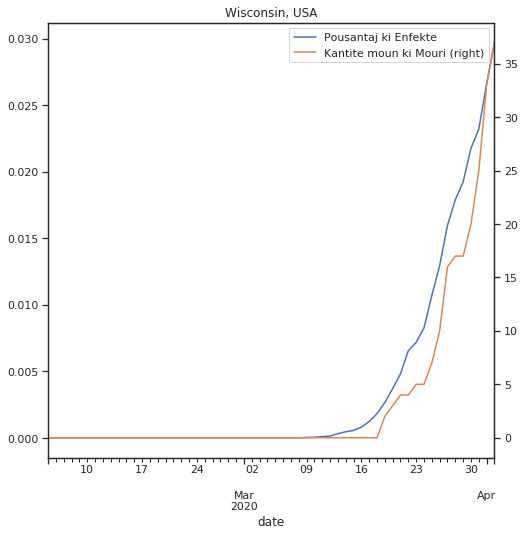

In [5]:
ax=data.query("state=='Wisconsin'")[['case_pct', 'deaths']].rename(columns={'case_pct':'Pousantaj ki Enfekte', 'deaths':'Kantite moun ki Mouri'}).plot(figsize=(8,8), secondary_y='Kantite moun ki Mouri', title="Wisconsin, USA")
fig = ax.get_figure()
fig.savefig(f"../writeups/images/WI.png")

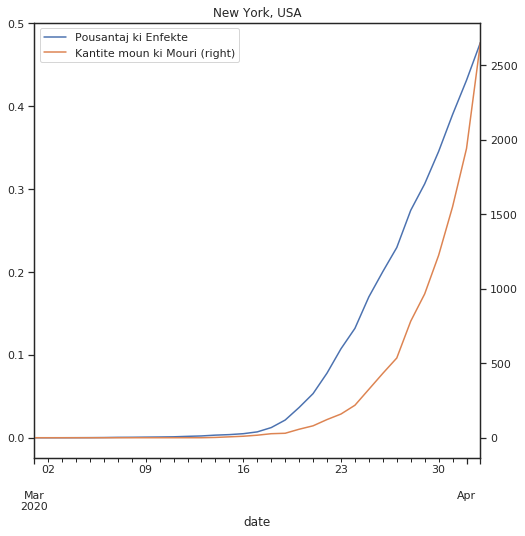

In [6]:
ax=data.query("state=='New York'")[['case_pct', 'deaths']].rename(columns={'case_pct':'Pousantaj ki Enfekte', 'deaths':'Kantite moun ki Mouri'}).plot(figsize=(8,8), secondary_y='Kantite moun ki Mouri', title="New York, USA")
fig = ax.get_figure()
fig.savefig(f"../writeups/images/NY.png")

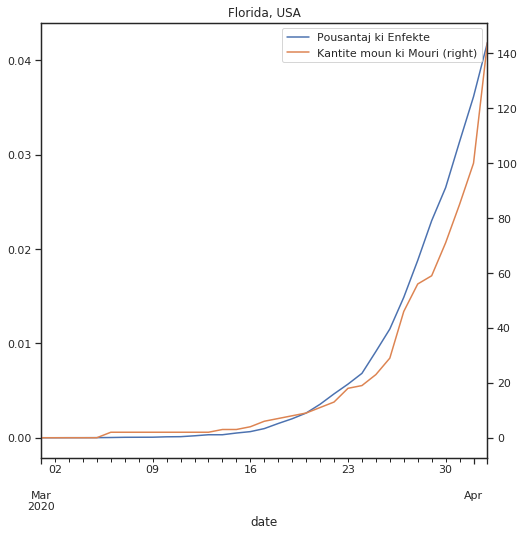

In [7]:
ax=data.query("state=='Florida'")[['case_pct', 'deaths']].rename(columns={'case_pct':'Pousantaj ki Enfekte', 'deaths':'Kantite moun ki Mouri'}).plot(figsize=(8,8), secondary_y='Kantite moun ki Mouri', title="Florida, USA")
fig = ax.get_figure()
fig.savefig(f"../writeups/images/FL.png")

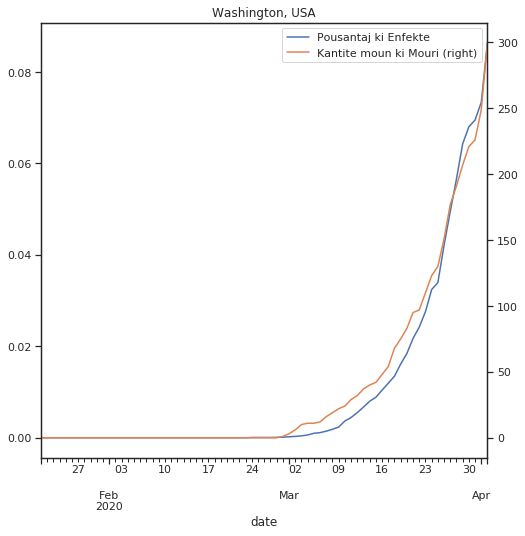

In [8]:
ax=data.query("state=='Washington'")[['case_pct', 'deaths']].rename(columns={'case_pct':'Pousantaj ki Enfekte', 'deaths':'Kantite moun ki Mouri'}).plot(figsize=(8,8), secondary_y='Kantite moun ki Mouri', title="Washington, USA")
fig = ax.get_figure()
fig.savefig(f"../writeups/images/WA.png")

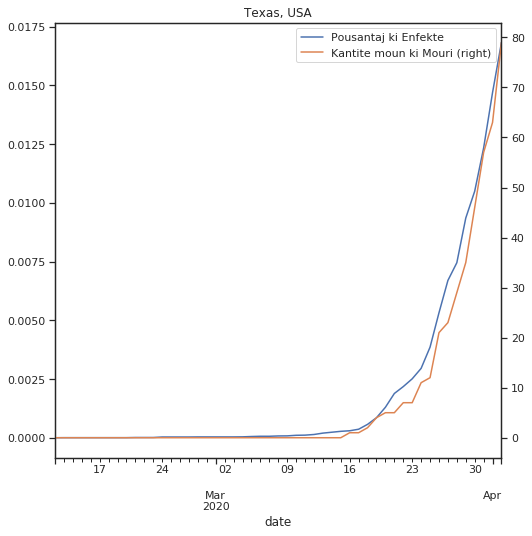

In [9]:
ax=data.query("state=='Texas'")[['case_pct', 'deaths']].rename(columns={'case_pct':'Pousantaj ki Enfekte', 'deaths':'Kantite moun ki Mouri'}).plot(figsize=(8,8), secondary_y='Kantite moun ki Mouri', title="Texas, USA")
fig = ax.get_figure()
fig.savefig(f"../writeups/images/TX.png")

In [10]:
data.query("state=='Alabama'")[['case_pct', 'deaths']]

,case_pct,deaths
date,,
2020-03-13,0.000122,0
2020-03-14,0.000245,0
2020-03-15,0.000469,0
2020-03-16,0.000591,0
2020-03-17,0.000795,0
2020-03-18,0.001040,0
2020-03-19,0.001591,0
2020-03-20,0.002162,0
2020-03-21,0.002672,0


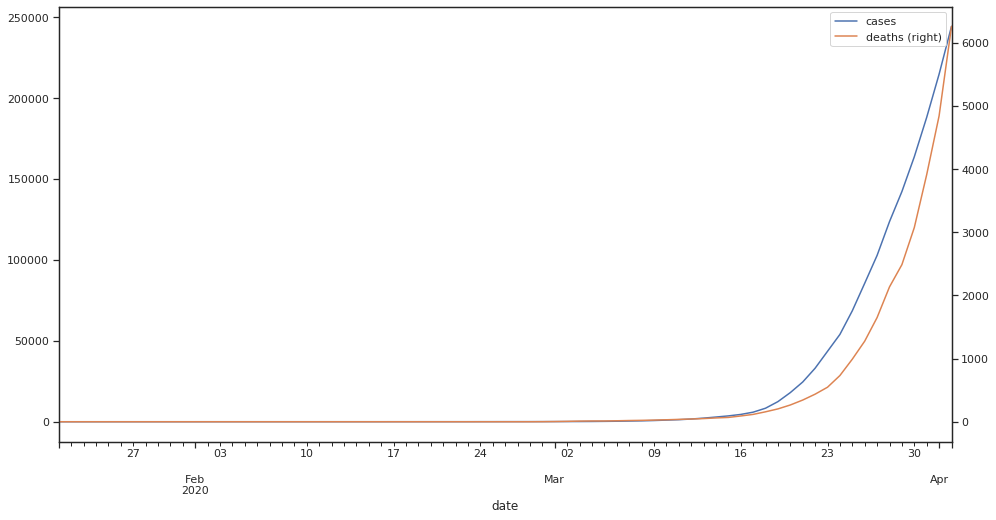

In [24]:
us = data.reset_index().groupby("date")[['cases','deaths']].sum()
#us['cases'] = us.cases/331_002_651
us.plot(secondary_y='deaths', figsize=(16,8))

In [23]:
58_004 / (1_076_017 + 58_004 + 225_335)

0.042670205597356396

In [25]:
us.tail()

,cases,deaths
date,,
2020-03-29,142171,2486
2020-03-30,163653,3073
2020-03-31,188019,3911
2020-04-01,214681,4841
2020-04-02,244191,6257
